In [243]:
import pandas as pd
import json
import numpy as np
import seaborn as sns

In [2]:
def CustomParser(data):
    j1 = json.loads(data)
    return j1

In [66]:
classifications = pd.read_csv('brain-match-classifications.csv', converters={'metadata':CustomParser,'annotations':CustomParser,'subject_data':CustomParser},header=0)

In [67]:
# Select only Brainhack tester users
user_list = ['Sara','Benjamin','Maxime','Basile','Angela']
classifications_select = classifications[classifications['workflow_name'].isin(user_list)]
classifications_select.reset_index(drop=True,inplace=True)
classifications_select.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,31398994,bpinsard,1596073.0,829979bfc31cae270258,3604,Basile,1.1,2017-03-03 18:12:26 UTC,NaN,NaN,{'session': '22e7e7c580cc41169ab591ac02f463ae8...,"[{'task': 'T1', 'task_label': 'Tag mismatched ...","{'6484727': {'retired': {'id': 4281888, 'workf...",6484727
1,31399029,bpinsard,1596073.0,829979bfc31cae270258,3604,Basile,1.1,2017-03-03 18:12:35 UTC,NaN,NaN,{'session': '22e7e7c580cc41169ab591ac02f463ae8...,"[{'task': 'T1', 'task_label': 'Tag mismatched ...","{'6484714': {'retired': {'id': 4281893, 'workf...",6484714
2,31399078,bpinsard,1596073.0,829979bfc31cae270258,3604,Basile,1.1,2017-03-03 18:12:50 UTC,NaN,NaN,{'session': '22e7e7c580cc41169ab591ac02f463ae8...,"[{'task': 'T1', 'task_label': 'Tag mismatched ...","{'6484746': {'retired': {'id': 4281907, 'workf...",6484746
3,31399081,benjamindeleener,1595642.0,829979bfc31cae270258,3606,Benjamin,1.1,2017-03-03 18:12:51 UTC,NaN,NaN,{'session': 'b2256f86aaa7184bb5c5841fbe7d04a12...,"[{'task': 'T1', 'task_label': 'Tag mismatched ...","{'6484183': {'retired': {'id': 4281906, 'workf...",6484183
4,31399193,bpinsard,1596073.0,829979bfc31cae270258,3604,Basile,1.1,2017-03-03 18:13:24 UTC,NaN,NaN,{'session': '22e7e7c580cc41169ab591ac02f463ae8...,"[{'task': 'T1', 'task_label': 'Tag mismatched ...","{'6484710': {'retired': {'id': 4281931, 'workf...",6484710


In [68]:
# extract tagging count
classifications_select.loc[:,"n_tagging"] = [ len(q[0]['value']) for q in classifications_select.annotations]
# extract rating count
classifications_select.loc[:,"rating"] = [ q[1]['value'] for q in classifications_select.annotations]
# extract subjects id
classifications_select.loc[:,"ID"] = [ row.subject_data[str(classifications_select.subject_ids[ind])]['subject_ID'] for ind,row in classifications_select.iterrows()]
# extract files name
classifications_select.loc[:,"imgnm"] = [ row.subject_data[str(classifications_select.subject_ids[ind])]['Image1'] for ind,row in classifications_select.iterrows()]

/Users/anayaji/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/anayaji/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [63]:
classifications_select.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,ID,n_tagging,rating,imgnm
0,31398994,bpinsard,1596073.0,829979bfc31cae270258,3604,Basile,1.1,2017-03-03 18:12:26 UTC,NaN,NaN,{'session': '22e7e7c580cc41169ab591ac02f463ae8...,"[{'task': 'T1', 'task_label': 'Tag mismatched ...","{'6484727': {'retired': {'id': 4281888, 'workf...",6484727,X3912996,11,Fail,X_3912996_anat.jpg
1,31399029,bpinsard,1596073.0,829979bfc31cae270258,3604,Basile,1.1,2017-03-03 18:12:35 UTC,NaN,NaN,{'session': '22e7e7c580cc41169ab591ac02f463ae8...,"[{'task': 'T1', 'task_label': 'Tag mismatched ...","{'6484714': {'retired': {'id': 4281893, 'workf...",6484714,X2768273,0,Fail,X_2768273_anat.jpg
2,31399078,bpinsard,1596073.0,829979bfc31cae270258,3604,Basile,1.1,2017-03-03 18:12:50 UTC,NaN,NaN,{'session': '22e7e7c580cc41169ab591ac02f463ae8...,"[{'task': 'T1', 'task_label': 'Tag mismatched ...","{'6484746': {'retired': {'id': 4281907, 'workf...",6484746,X1743472,0,Fail,X_1743472_anat.jpg
3,31399081,benjamindeleener,1595642.0,829979bfc31cae270258,3606,Benjamin,1.1,2017-03-03 18:12:51 UTC,NaN,NaN,{'session': 'b2256f86aaa7184bb5c5841fbe7d04a12...,"[{'task': 'T1', 'task_label': 'Tag mismatched ...","{'6484183': {'retired': {'id': 4281906, 'workf...",6484183,X2232376,2,Maybe,X_2232376_anat.jpg
4,31399193,bpinsard,1596073.0,829979bfc31cae270258,3604,Basile,1.1,2017-03-03 18:13:24 UTC,NaN,NaN,{'session': '22e7e7c580cc41169ab591ac02f463ae8...,"[{'task': 'T1', 'task_label': 'Tag mismatched ...","{'6484710': {'retired': {'id': 4281931, 'workf...",6484710,X3160561,9,Fail,X_3160561_anat.jpg


In [69]:
classifications_select.count()

classification_id    264
user_name            264
user_id              264
user_ip              264
workflow_id          264
workflow_name        264
workflow_version     264
created_at           264
gold_standard          0
expert                 0
metadata             264
annotations          264
subject_data         264
subject_ids          264
n_tagging            264
rating               264
ID                   264
imgnm                264
dtype: int64

Here we should have 250 rating (5 subjects x 50 Ratings), But We have 14 extra rating.

Let's remove them:

In [144]:
# get duplicated
tmp_duplicate = classifications_select[classifications_select.subject_ids.duplicated(keep='last')].sort_values(['subject_ids'])
tmp_duplicate.count()

classification_id    14
user_name            14
user_id              14
user_ip              14
workflow_id          14
workflow_name        14
workflow_version     14
created_at           14
gold_standard         0
expert                0
metadata             14
annotations          14
subject_data         14
subject_ids          14
n_tagging            14
rating               14
ID                   14
imgnm                14
dtype: int64

In [145]:
# Drop duplicated 
classifications_clean = classifications_select.drop(tmp_duplicate.index)
classifications_clean.count()

classification_id    250
user_name            250
user_id              250
user_ip              250
workflow_id          250
workflow_name        250
workflow_version     250
created_at           250
gold_standard          0
expert                 0
metadata             250
annotations          250
subject_data         250
subject_ids          250
n_tagging            250
rating               250
ID                   250
imgnm                250
dtype: int64

In [157]:
# Select single user workflow
workflow_Sara = classifications_clean[classifications_clean.workflow_name == 'Sara']
workflow_Benjamin = classifications_clean[classifications_clean.workflow_name == 'Benjamin']
workflow_Maxime = classifications_clean[classifications_clean.workflow_name == 'Maxime']
workflow_Basile = classifications_clean[classifications_clean.workflow_name == 'Basile']
workflow_Angela = classifications_clean[classifications_clean.workflow_name == 'Angela']

In [167]:
# Concatenate ratings in one dataframe
dfs = [workflow_Angela[['ID','rating']].rename(columns={'rating': 'rating_angela'}),workflow_Basile[['ID','rating']].rename(columns={'rating': 'rating_basile'}),workflow_Benjamin[['ID','rating']].rename(columns={'rating': 'rating_benjamin'}),workflow_Maxime[['ID','rating']].rename(columns={'rating': 'rating_maxime'}),workflow_Sara[['ID','rating']].rename(columns={'rating': 'rating_sara'})]
# Merge all according to ID column
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,on='ID'), dfs)

In [168]:
df_final.head()

,ID,rating_angela,rating_basile,rating_benjamin,rating_maxime,rating_sara
0,X3322144,Maybe,Fail,Maybe,Fail,Fail
1,SZ0040080,OK,OK,OK,OK,Maybe
2,SZ0040039,Maybe,Fail,OK,OK,OK
3,SZ0040011,OK,Maybe,Maybe,Maybe,Maybe
4,SZ0040046,OK,Maybe,OK,Maybe,Maybe


In [170]:
# Add matching column
df_final.loc[:,"rating_match"] = [ row["rating_angela"] == row["rating_basile"] == row["rating_benjamin"] == row["rating_maxime"] == row["rating_sara"] for ind,row in df_final.iterrows()]
df_final

,ID,rating_angela,rating_basile,rating_benjamin,rating_maxime,rating_sara,rating_match
0,X3322144,Maybe,Fail,Maybe,Fail,Fail,False
1,SZ0040080,OK,OK,OK,OK,Maybe,False
2,SZ0040039,Maybe,Fail,OK,OK,OK,False
3,SZ0040011,OK,Maybe,Maybe,Maybe,Maybe,False
4,SZ0040046,OK,Maybe,OK,Maybe,Maybe,False
5,X2136051,Fail,Fail,Fail,Fail,Fail,True
6,X0010045,Maybe,Fail,OK,Fail,Maybe,False
7,X2854839,Fail,Fail,Fail,Fail,Fail,True
8,X0021014,Fail,Fail,Fail,Fail,Fail,True
9,X3433846,Maybe,Fail,Fail,OK,Fail,False


In [184]:
# Replace OK:1 , Maybe:2 and Fail:3
df_final.replace({'OK':1,'Maybe':2, 'Fail':3}, inplace=True)
df_final.head()

,ID,rating_angela,rating_basile,rating_benjamin,rating_maxime,rating_sara,rating_match
0,X3322144,2,3,2,3,3,False
1,SZ0040080,1,1,1,1,2,False
2,SZ0040039,2,3,1,1,1,False
3,SZ0040011,1,2,2,2,2,False
4,SZ0040046,1,2,1,2,2,False


In [336]:
# Generate Kappa matrix rater by rater 
iter_list = df_final.ix[:,1:6].columns.values.tolist()
kappa_store = np.zeros((len(iter_list), len(iter_list)))
for net_id in range(len(iter_list)):
    rater_1 = iter_list[net_id]
    for s_id in range(len(iter_list)):
        rater_2 = iter_list[s_id]
        kappa = metrics.cohen_kappa_score(df_final[[rater_1]],df_final[[rater_2]])
        # Save the kappa
        kappa_store[net_id, s_id] = kappa

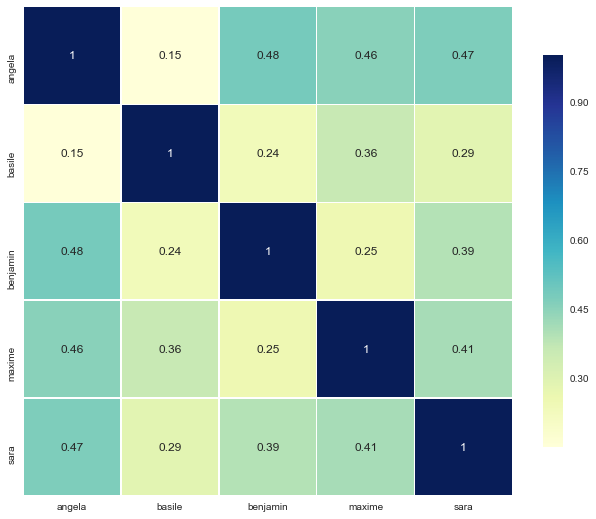

In [337]:
# Plot kappa matrix
trunc_list = [ii[7:] for ii in iter_list]
kappa_out = pd.DataFrame(kappa_store, index=trunc_list, columns=trunc_list)
sns.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the map
sns.heatmap(kappa_out,vmax=1,cmap="YlGnBu",
            square=True,annot=True,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

In [334]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.stack.imgur.com/kYNd6.png" ,width=600, height=600)

In [116]:
# output markings from 50 classifications
clist=[]
for index, c in workflow_Basile.iterrows():
    if c['n_tagging'] >= 0:
        for q in c.annotations[0]['value']:
            clist.append({'ID':c.ID, 'workflow_name':c.workflow_name, 'rating':c.rating,'imgnm':c.imgnm, 
                          'x':q['x'], 'y':q['y'], 'r':'2','n_tagging':c.n_tagging ,'frame':q['frame']})

col_order=['ID','workflow_name','rating','x','y','r','n_tagging','imgnm','frame']
out=pd.DataFrame(clist)[col_order]

In [117]:
out.sort_values(by=('n_tagging'), ascending= True).head()

,ID,workflow_name,rating,x,y,r,n_tagging,imgnm,frame
215,SZ0040046,Basile,Maybe,321,123.5,2,2,SZ0040046_anat.jpg,1
216,SZ0040046,Basile,Maybe,345,128.5,2,2,SZ0040046_anat.jpg,1
142,SZ0040007,Basile,Fail,502,164.5,2,3,SZ0040007_anat.jpg,1
141,SZ0040007,Basile,Fail,553,167.5,2,3,SZ0040007_anat.jpg,0
140,SZ0040007,Basile,Fail,53,361.5,2,3,SZ0040007_anat.jpg,0


In [93]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
for index, c in workflow_Basile.iterrows():
    if c['n_tagging'] == 0:
        print(index,c.imgnm)

1 X_2768273_anat.jpg
5 X_2409220_anat.jpg
8 X_0010013_anat.jpg
12 X_3107623_anat.jpg
14 X_3662296_anat.jpg
25 SZ0040049_anat.jpg
34 X_2559559_anat.jpg
105 SZ0040080_anat.jpg
110 X_1536593_anat.jpg
122 X_0010003_anat.jpg
123 X_2232376_anat.jpg
151 X_3515506_anat.jpg
158 X_0010067_anat.jpg
173 X_3560456_anat.jpg
191 X_1743472_anat.jpg


In [181]:
# Unique Subjects
usub = out.drop_duplicates(subset='ID')
len(usub)

34

In [183]:
# Make Images

# Select Subject Index Number
subsel=12

marks = out[out.subject_ids == usub.subject_ids[subsel]]
imgnm = list(json.loads(usub.subject_data[subsel]).values())[0]['IMG_COLOR']

imgpath='../ap_sampledata/'
imgfile=imgpath+imgnm

fig, ax = plt.subplots()
im = plt.imread(imgfile)
ax.imshow(im)
for index, m in marks.iterrows():
    if m.tool == 0:
        ax.add_artist(plt.Circle( (m.x, m.y), m.r, color='b', fill=False))
    if m.tool == 1:
        ax.add_artist(plt.Circle( (m.x, m.y), m.r, color='r', fill=False))
    if m.tool > 1:
        ax.add_artist(plt.Circle( (m.x, m.y), m.r, color='g', fill=False))

plt.axis('off')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('out_'+imgnm, dpi=120, bbox_inches='tight', pad_inches=0)

KeyError: 12